# Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

pd.set_option('display.max_columns', 200)

In [3]:
df = pd.read_csv('data/cleaned_status_data.csv')
df.head()

,Unnamed: 0,target,amount_tsh,gps_height,longitude,latitude,num_private,district_code,population,public_meeting,permit,construction_year,payment,basin_Lake_Nyasa,basin_Lake_Rukwa,basin_Lake_Tanganyika,basin_Lake_Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma_Southern_Coast,basin_Wami_Ruvu,region_coastal,region_lake,region_north_highland,region_south_highland,region_southern,lga_Arusha_Urban,lga_Babati,lga_Bagamoyo,lga_Bahi,lga_Bariadi,lga_Biharamulo,lga_Bukoba_Rural,lga_Bukoba_Urban,lga_Bukombe,lga_Bunda,lga_Chamwino,lga_Chato,lga_Chunya,lga_Dodoma_Urban,lga_Geita,lga_Hai,lga_Hanang,lga_Handeni,lga_Igunga,lga_Ilala,lga_Ileje,lga_Ilemela,lga_Iramba,lga_Iringa_Rural,lga_Kahama,lga_Karagwe,lga_Karatu,lga_Kasulu,lga_Kibaha,lga_Kibondo,lga_Kigoma_Rural,lga_Kigoma_Urban,lga_Kilindi,lga_Kilolo,lga_Kilombero,lga_Kilosa,lga_Kilwa,lga_Kinondoni,lga_Kisarawe,lga_Kishapu,lga_Kiteto,lga_Kondoa,lga_Kongwa,lga_Korogwe,lga_Kwimba,lga_Kyela,lga_Lindi_Rural,lga_Liwale,lga_Longido,lga_Ludewa,lga_Lushoto,lga_Mafia,lga_Magu,lga_Makete,lga_Manyoni,lga_Masasi,lga_Maswa,lga_Mbarali,lga_Mbeya_Rural,lga_Mbinga,lga_Mbozi,lga_Mbulu,lga_Meatu,lga_Meru,lga_Misenyi,lga_Missungwi,lga_Mkinga,lga_Mkuranga,lga_Monduli,lga_Morogoro_Rural,lga_Morogoro_Urban,lga_Moshi_Rural,lga_Moshi_Urban,lga_Mpanda,lga_Mpwapwa,lga_Mtwara_Rural,lga_Mtwara_Urban,lga_Mufindi,lga_Muheza,lga_Muleba,lga_Musoma_Rural,lga_Mvomero,lga_Mwanga,lga_Nachingwea,lga_Namtumbo,lga_Nanyumbu,lga_Newala,lga_Ngara,lga_Ngorongoro,lga_Njombe,lga_Nkasi,lga_Nyamagana,lga_Nzega,lga_Pangani,lga_Rombo,lga_Rorya,lga_Ruangwa,lga_Rufiji,lga_Rungwe,lga_Same,lga_Sengerema,lga_Serengeti,lga_Shinyanga_Rural,lga_Shinyanga_Urban,lga_Siha,lga_Sikonge,lga_Simanjiro,lga_Singida_Rural,lga_Singida_Urban,lga_Songea_Rural,lga_Songea_Urban,lga_Sumbawanga_Rural,lga_Sumbawanga_Urban,lga_Tabora_Urban,lga_Tandahimba,lga_Tanga,lga_Tarime,lga_Temeke,lga_Tunduru,lga_Ukerewe,lga_Ulanga,lga_Urambo,lga_Uyui,sm_Parastatal,sm_Private_operator,sm_SWC,sm_Trust,sm_VWC,sm_WUA,sm_WUG,sm_Water_Board,sm_Water_authority,et_handpump,et_motorpump,et_rope_pump,et_submersible,et_wind_powered,mg_parastatal,mg_user_group,quality_fluoride,quality_good,quality_milky,quality_salty,quantity_enough,quantity_insufficient,quantity_seasonal,source_dam,source_rainwater_harvesting,source_river_lake,source_shallow_well,source_spring,wp_type_communal_standpipe,wp_type_dam,wp_type_hand_pump,wp_type_improved_spring
0,2,1,0.105961,0.264384,0.735732,0.733417,0,4,0.587264,1,1,2009,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0
1,3,0,0.105961,0.115072,0.831861,0.040709,0,63,0.134434,1,1,1986,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,6,0,0.105961,0.258135,0.351565,0.738609,0,3,0.421958,1,1,1996,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,8,0,0.105961,0.258135,0.290512,0.608232,0,6,0.421958,1,1,1996,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,

In [4]:
df.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

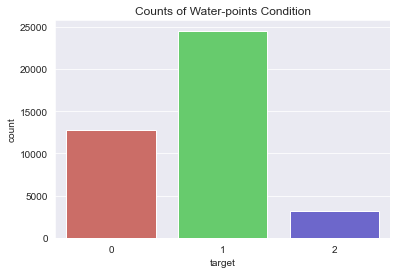

In [6]:
sns.countplot(x='target', data=df, palette='hls')
plt.title('Counts of Water-points Condition')
plt.show()

# Modeling

I begin with the Random Forest and XGBoost baseline model with their baseline parameters. 

## Train-test split

In [7]:
y = df.target

In [8]:
X = df.drop('target', axis=1)
X

,amount_tsh,gps_height,longitude,latitude,num_private,district_code,population,public_meeting,permit,construction_year,payment,basin_Lake_Nyasa,basin_Lake_Rukwa,basin_Lake_Tanganyika,basin_Lake_Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma_Southern_Coast,basin_Wami_Ruvu,region_coastal,region_lake,region_north_highland,region_south_highland,region_southern,lga_Arusha_Urban,lga_Babati,lga_Bagamoyo,lga_Bahi,lga_Bariadi,lga_Biharamulo,lga_Bukoba_Rural,lga_Bukoba_Urban,lga_Bukombe,lga_Bunda,lga_Chamwino,lga_Chato,lga_Chunya,lga_Dodoma_Urban,lga_Geita,lga_Hai,lga_Hanang,lga_Handeni,lga_Igunga,lga_Ilala,lga_Ileje,lga_Ilemela,lga_Iramba,lga_Iringa_Rural,lga_Kahama,lga_Karagwe,lga_Karatu,lga_Kasulu,lga_Kibaha,lga_Kibondo,lga_Kigoma_Rural,lga_Kigoma_Urban,lga_Kilindi,lga_Kilolo,lga_Kilombero,lga_Kilosa,lga_Kilwa,lga_Kinondoni,lga_Kisarawe,lga_Kishapu,lga_Kiteto,lga_Kondoa,lga_Kongwa,lga_Korogwe,lga_Kwimba,lga_Kyela,lga_Lindi_Rural,lga_Liwale,lga_Longido,lga_Ludewa,lga_Lushoto,lga_Mafia,lga_Magu,lga_Makete,lga_Manyoni,lga_Masasi,lga_Maswa,lga_Mbarali,lga_Mbeya_Rural,lga_Mbinga,lga_Mbozi,lga_Mbulu,lga_Meatu,lga_Meru,lga_Misenyi,lga_Missungwi,lga_Mkinga,lga_Mkuranga,lga_Monduli,lga_Morogoro_Rural,lga_Morogoro_Urban,lga_Moshi_Rural,lga_Moshi_Urban,lga_Mpanda,lga_Mpwapwa,lga_Mtwara_Rural,lga_Mtwara_Urban,lga_Mufindi,lga_Muheza,lga_Muleba,lga_Musoma_Rural,lga_Mvomero,lga_Mwanga,lga_Nachingwea,lga_Namtumbo,lga_Nanyumbu,lga_Newala,lga_Ngara,lga_Ngorongoro,lga_Njombe,lga_Nkasi,lga_Nyamagana,lga_Nzega,lga_Pangani,lga_Rombo,lga_Rorya,lga_Ruangwa,lga_Rufiji,lga_Rungwe,lga_Same,lga_Sengerema,lga_Serengeti,lga_Shinyanga_Rural,lga_Shinyanga_Urban,lga_Siha,lga_Sikonge,lga_Simanjiro,lga_Singida_Rural,lga_Singida_Urban,lga_Songea_Rural,lga_Songea_Urban,lga_Sumbawanga_Rural,lga_Sumbawanga_Urban,lga_Tabora_Urban,lga_Tandahimba,lga_Tanga,lga_Tarime,lga_Temeke,lga_Tunduru,lga_Ukerewe,lga_Ulanga,lga_Urambo,lga_Uyui,sm_Parastatal,sm_Private_operator,sm_SWC,sm_Trust,sm_VWC,sm_WUA,sm_WUG,sm_Water_Board,sm_Water_authority,et_handpump,et_motorpump,et_rope_pump,et_submersible,et_wind_powered,mg_parastatal,mg_user_group,quality_fluoride,quality_good,quality_milky,quality_salty,quantity_enough,quantity_insufficient,quantity_seasonal,source_dam,source_rainwater_harvesting,source_river_lake,source_shallow_well,source_spring,wp_type_communal_standpipe,wp_type_dam,wp_type_hand_pump,wp_type_improved_spring
0,0.105961,0.264384,0.735732,0.733417,0,4,0.587264,1,1,2009,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0
1,0.105961,0.115072,0.831861,0.040709,0,63,0.134434,1,1,1986,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0.105961,0.258135,0.351565,0.738609,0,3,0.421958,1,1,1996,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,0.105961,0.258135,0.290512,0.608232,0,6,0.421958,1,1,1996,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 123)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(30371, 179) (10124, 179) (30371,) (10124,)


In [ ]:
# working with pipelines to help make a cleaner looking notebook
# finish later

# from sklearn.pipeline import Pipeline

# pipeline = Pipeline([
#     ('forest_clf', RandomForestClassifier()),
#     ('xgb_clf', XGBClassifier())
# ])

## Random Forest - Baseline Acc: 0.78

In [9]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier()
forest_model = forest_clf.fit(X_train, y_train)

forest_train_preds = forest_model.predict(X_train)
forest_train_acc = accuracy_score(y_train, forest_train_preds)
forest_val_preds = forest_model.predict(X_test) 
forest_val_acc = accuracy_score(y_test, forest_val_preds)

print(f'Train accuracy: {forest_train_acc} \nTest accuracy: {forest_val_acc}')

Train accuracy: 0.9932172137894703 
Test accuracy: 0.7820031608060055


The accuracy of the Random Forest model is really high. The model has a lackluster performance on the test set compared to the training set, suggesting the model is overfitting on the train data. Tuning the model would hopefully help increase performance and prevent overfitting.

**Confusion Matrix**

Confusion matrix, without normalization
[[2335  801   76]
 [ 558 5353  187]
 [ 103  482  229]]
Normalized confusion matrix
[[0.72696139 0.24937733 0.02366127]
 [0.09150541 0.8778288  0.03066579]
 [0.12653563 0.59213759 0.28132678]]


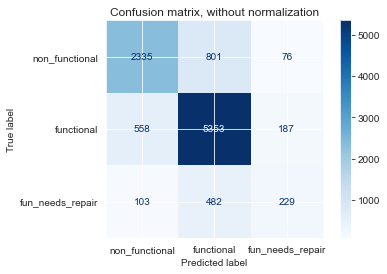

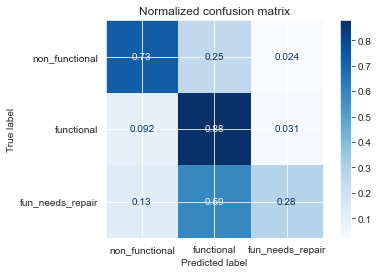

In [10]:
from sklearn.metrics import plot_confusion_matrix
class_names = ['non_functional', 'functional', 'fun_needs_repair']
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(forest_model, X_test, y_test,
                                 display_labels=class_names, 
                                 cmap=plt.cm.Blues, 
                                 normalize=normalize)
                                 
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

**True Positives**

* <b>Nonfunctional: 72%</b>
* <b>Functional: 89%</b>
* <b>Functional needs repair: 27%</b>

**These are the percentages of the model predictions versus the actual value**

In [11]:
print(classification_report(y_test, forest_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.73      0.75      3212
           1       0.81      0.88      0.84      6098
           2       0.47      0.28      0.35       814

    accuracy                           0.78     10124
   macro avg       0.68      0.63      0.65     10124
weighted avg       0.77      0.78      0.77     10124



The precision and recall for class 0 and 1 are pretty good. The accuracy is probable affected by class 3 and the small amount of data for that class.

## Random Forest With Parameters Acc: 0.74

In [12]:
forest_model_2 = RandomForestClassifier(criterion = 'gini', 
                                        max_depth = 13, 
                                        n_estimators = 350,
                                        min_samples_leaf = 4, 
                                        min_samples_split = 8
                                       )
forest_model_2.fit(X_train, y_train)

RandomForestClassifier(max_depth=13, min_samples_leaf=4, min_samples_split=8,
                       n_estimators=350)

In [13]:
forest_train_preds = forest_model_2.predict(X_train)
forest_train_acc = accuracy_score(y_train, forest_train_preds)
forest_val_preds = forest_model_2.predict(X_test) 
forest_val_acc = accuracy_score(y_test, forest_val_preds)

print(f'Train accuracy: {forest_train_acc} \nTest accuracy: {forest_val_acc}')

Train accuracy: 0.7505185868097857 
Test accuracy: 0.7358751481627815


In [14]:
print(classification_report(y_test, forest_model_2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.47      0.61      3212
           1       0.71      0.97      0.82      6098
           2       0.71      0.06      0.10       814

    accuracy                           0.74     10124
   macro avg       0.76      0.50      0.51     10124
weighted avg       0.76      0.74      0.69     10124



Confusion matrix, without normalization
[[1513 1693    6]
 [ 194 5891   13]
 [  59  709   46]]
Normalized confusion matrix
[[0.47104608 0.52708593 0.001868  ]
 [0.03181371 0.96605444 0.00213185]
 [0.07248157 0.87100737 0.05651106]]


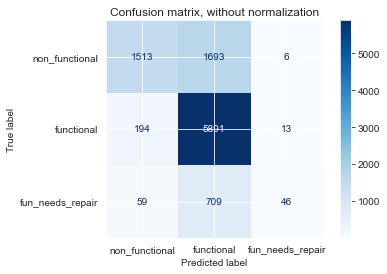

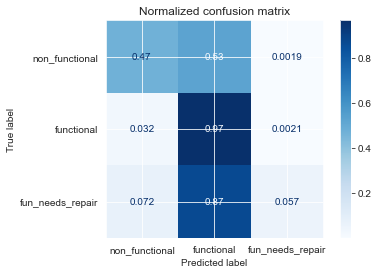

In [15]:
class_names = ['non_functional', 'functional', 'fun_needs_repair']
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(forest_model_2, X_test, y_test,
                                 display_labels=class_names, 
                                 cmap=plt.cm.Blues, 
                                 normalize=normalize)
                                 
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

The accuracy score is smaller than the first random forest model. Though here we don't have to worry about overfitting. Still the first model seems like the best model based on the accuracy.

**True Positives**

* <b>Nonfunctional: 46%</b>
* <b>Functional: 97%</b>
* <b>Functional needs repair: 6%</b>

## XGBoost - Baseline Acc: 0.78

In [16]:
from xgboost import XGBClassifier

In [17]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [18]:
training_preds = xgb_model.predict(X_train)
test_preds = xgb_model.predict(X_test)

training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 82.08%
Validation accuracy: 77.97%


In [19]:
print(confusion_matrix(y_test, xgb_model.predict(X_test)))
print(classification_report(y_test, xgb_model.predict(X_test)))

[[2137 1047   28]
 [ 399 5631   68]
 [ 111  577  126]]
              precision    recall  f1-score   support

           0       0.81      0.67      0.73      3212
           1       0.78      0.92      0.84      6098
           2       0.57      0.15      0.24       814

    accuracy                           0.78     10124
   macro avg       0.72      0.58      0.61     10124
weighted avg       0.77      0.78      0.76     10124



Confusion matrix, without normalization
[[2137 1047   28]
 [ 399 5631   68]
 [ 111  577  126]]
Normalized confusion matrix
[[0.66531756 0.32596513 0.00871731]
 [0.06543129 0.92341751 0.0111512 ]
 [0.13636364 0.70884521 0.15479115]]


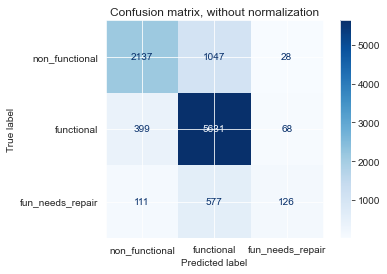

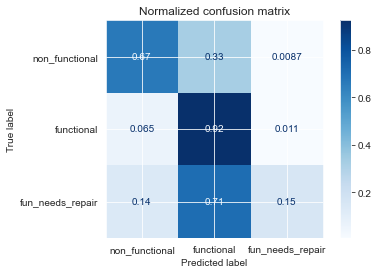

In [20]:
class_names = ['non_functional', 'functional', 'fun_needs_repair']
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(xgb_model, X_test, y_test,
                                 display_labels=class_names, 
                                 cmap=plt.cm.Blues, 
                                 normalize=normalize)
                                 
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

**XGBoost**

* Though the accuracy is lower then our first RandomForest model, XGBoost doesn't have to worry about overfitting the model. The accuracy of both models are the same as well. So far this seems like the better model.

**True Positives**

* <b>Nonfunctional: 66%</b>
* <b>Functional: 93%</b>
* <b>Functional needs repair: 15%</b>

## XGBoost Model with Params Acc: 0.79

These params comes from GridSearchCV from another notebook. 

In [21]:
xgb_model_2 = XGBClassifier(max_depth= 13, 
                            n_estimators=350, 
                            tree_method='auto', 
                            learning_rate=0.4, 
                            random_state=123,
                            min_child_weight=10,
                            gamma=1
                           )
xgb_model_2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.4, max_delta_step=0, max_depth=13,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=350, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=123, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='auto', validate_parameters=1, verbosity=None)

In [22]:
training_preds = xgb_model_2.predict(X_train)
test_preds = xgb_model_2.predict(X_test)

training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 87.14%
Validation accuracy: 78.76%


In [23]:
print(classification_report(y_test, xgb_model_2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75      3212
           1       0.80      0.91      0.85      6098
           2       0.55      0.21      0.31       814

    accuracy                           0.79     10124
   macro avg       0.71      0.61      0.63     10124
weighted avg       0.78      0.79      0.77     10124



Confusion matrix, without normalization
[[2271  893   48]
 [ 477 5529   92]
 [ 109  531  174]]
Normalized confusion matrix
[[0.70703611 0.27801993 0.01494396]
 [0.07822237 0.90669072 0.01508691]
 [0.13390663 0.65233415 0.21375921]]


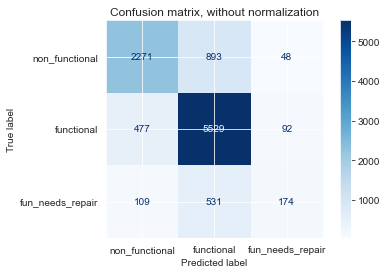

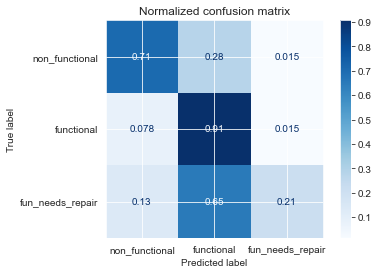

In [24]:
class_names = ['non_functional', 'functional', 'fun_needs_repair']
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(xgb_model_2, X_test, y_test,
                                 display_labels=class_names, 
                                 cmap=plt.cm.Blues, 
                                 normalize=normalize)
                                 
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

**XGBoost-with tuning**

* After some tuning the accuracy of the training data went up a little bit for both the training and the testing data.

**True Positives**

* <b>Nonfunctional: 71%</b>
* <b>Functional: 91%</b>
* <b>Functional needs repair: 24%</b>

# Conclusion

**Feature Importances**

In [25]:
#Check which features are unimportant
import eli5
from eli5.sklearn import PermutationImportance

# instantiate and fit model
perm = PermutationImportance(xgb_model_2, scoring='accuracy', random_state=123).fit(X_train, y_train)

#display list
eli5.show_weights(perm, feature_names = X_train.columns.tolist())

Weight,Feature
0.2168 ± 0.0021,quantity_enough
0.1113 ± 0.0018,quantity_insufficient
0.0781 ± 0.0031,longitude
0.0773 ± 0.0027,latitude
0.0638 ± 0.0021,construction_year
0.0427 ± 0.0017,gps_height
0.0425 ± 0.0016,payment
0.0379 ± 0.0005,quantity_seasonal
0.0329 ± 0.0010,population
0.0130 ± 0.0015,district_code


I chose this model because of the <b>accuracy of 79%</b> and there's no worry about the data being over-trained. Though I think there's a chance with more time I can tune the parameters to get an higher accuracy. 

So looking at this model, it looks like the quantity of water play an important factor in determining the status of the well. Makes sense that more functional wells would have enough, while more non functional wells would be insufficient. The next two deals with location, for instance being close to a lake may affect the usage of different wells. I believe there's more to be done to be certain of these results. 